# Descriptive Statistics

 Variables may be classified into two main categories: **categorical and numeric**. Each category is then classified in two subcategories: **nominal or ordinal** for categorical variables, **discrete or continuous** for numeric variables. 

Descriptive statistics summarize and organize characteristics of a data set. A data set is a collection of responses or observations from a sample or entire population.

There are 3 main types of descriptive statistics:

* The **distribution** concerns the frequency of each value.
* The **central tendency** concerns the averages of the values.
* The **variability** or dispersion concerns how spread out the values are.

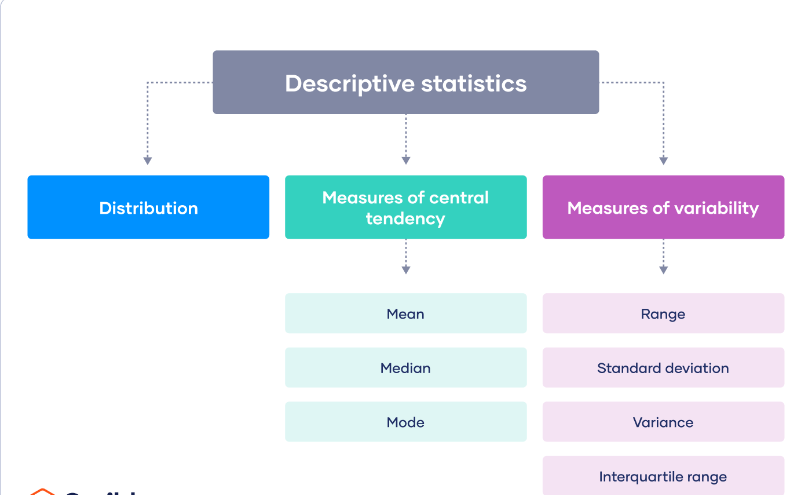

There exists a large number of methods for computing descriptive statistics and
other related operations on [Series](../reference/series.html#api-series-stats), [DataFrame](../reference/frame.html#api-dataframe-stats). Most of these
are aggregations (hence producing a lower-dimensional result) like
[`sum()`](../reference/api/pandas.DataFrame.sum.html#pandas.DataFrame.sum "pandas.DataFrame.sum"), [`mean()`](../reference/api/pandas.DataFrame.mean.html#pandas.DataFrame.mean "pandas.DataFrame.mean"), and [`quantile()`](../reference/api/pandas.DataFrame.quantile.html#pandas.DataFrame.quantile "pandas.DataFrame.quantile"),
but some of them, like [`cumsum()`](../reference/api/pandas.DataFrame.cumsum.html#pandas.DataFrame.cumsum "pandas.DataFrame.cumsum") and [`cumprod()`](../reference/api/pandas.DataFrame.cumprod.html#pandas.DataFrame.cumprod "pandas.DataFrame.cumprod"),
produce an object of the same size. Generally speaking, these methods take an
**axis** argument, just like *ndarray.{sum, std, …}*, but the axis can be
specified by name or integer:

For example:

In [4]:
df

,one,two,three
a,1.427925,-0.737671,NaN
b,0.187125,2.416114,-2.156894
c,0.185986,-0.391179,0.454061
d,NaN,-0.225035,-0.140469


In [5]:
df.mean(axis=0)

one      0.600345
two      0.265557
three   -0.614434
dtype: float64

In [6]:
# axis = 0 is equal to axis = 'rows'
df.mean(axis='rows')

one      0.600345
two      0.265557
three   -0.614434
dtype: float64

In [7]:
# 'index' is the same as 'rows' or 0
df.mean(axis='index')

one      0.600345
two      0.265557
three   -0.614434
dtype: float64

In [8]:
df.mean(axis=1)

a    0.345127
b    0.148782
c    0.082956
d   -0.182752
dtype: float64

All such methods have a `skipna` option signaling whether to exclude missing
data (`True` by default):

In [9]:
df

,one,two,three
a,1.427925,-0.737671,NaN
b,0.187125,2.416114,-2.156894
c,0.185986,-0.391179,0.454061
d,NaN,-0.225035,-0.140469


In [14]:
# skipna is by default True
df.mean(0)

one      0.600345
two      0.265557
three   -0.614434
dtype: float64

In [13]:
df.mean(0, skipna=True)

one      0.600345
two      0.265557
three   -0.614434
dtype: float64

In [12]:
# with False skipna, columns with Null values return None
df.mean(0, skipna=False)

one           NaN
two      0.265557
three         NaN
dtype: float64

In [11]:
df.sum(axis=1)

a    0.690255
b    0.446345
c    0.248868
d   -0.365504
dtype: float64

Combined with the broadcasting / arithmetic behavior, one can describe various
statistical procedures, like standardization (rendering data zero mean and
standard deviation of 1), very concisely:

In [15]:
df

,one,two,three
a,1.427925,-0.737671,NaN
b,0.187125,2.416114,-2.156894
c,0.185986,-0.391179,0.454061
d,NaN,-0.225035,-0.140469


In [16]:
ts_stand = (df - df.mean()) / df.std()

In [18]:
ts_stand.std()

one      1.0
two      1.0
three    1.0
dtype: float64

In [15]:
xs_stand = df.sub(df.mean(1), axis=0).div(df.std(1), axis=0)

In [16]:
xs_stand.std(1)

a    1.0
b    1.0
c    1.0
d    1.0
dtype: float64

Note that methods like `cumsum()` and `cumprod()`
preserve the location of `NaN` values.

In [17]:
abs(df).cumsum(axis=1)

,one,two,three
a,0.405407,1.327613,NaN
b,0.493397,1.550409,2.072624
c,0.985564,1.599159,3.919183
d,NaN,0.460339,0.862736


Here is a quick reference summary table of common functions. Each also takes an
optional `level` parameter which applies only if the object has a
[hierarchical index](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical).

|Function|Description|
|:--|:--|
|`count`|Number of non-NA observations|
|`sum`|Sum of values|
|`mean`|Mean of values|
|`mad`|Mean absolute deviation|
|`median`|Arithmetic median of values|
|`min`|Minimum|
|`max`|Maximum|
|`mode`|Mode|
|`abs`|Absolute Value|
|`prod`|Product of values|
|`std`|Bessel-corrected sample standard deviation|
|`var`|Unbiased variance|
|`sem`|Standard error of the mean|
|`skew`|Sample skewness (3rd moment)|
|`kurt`|Sample kurtosis (4th moment)|
|`quantile`|Sample quantile (value at %)|
|`cumsum`|Cumulative sum|
|`cumprod`|Cumulative product|
|`cummax`|Cumulative maximum|
|`cummin`|Cumulative minimum|

[`Series.nunique()`](../reference/api/pandas.Series.nunique.html#pandas.Series.nunique "pandas.Series.nunique") will return the number of unique non-NA values in a
Series:

In [18]:
series = pd.Series(np.random.randn(500))

In [19]:
series[20:500] = np.nan

In [20]:
series[10:20] = 5

In [21]:
series

0      0.124689
1     -0.192979
2     -1.071481
3     -0.865944
4      0.284645
         ...   
495         NaN
496         NaN
497         NaN
498         NaN
499         NaN
Length: 500, dtype: float64

In [22]:
series.nunique()

11

In [23]:
# On a dataframe, nunique return number of 
# unique values per column
df.nunique()

one      3
two      4
three    3
dtype: int64

In [24]:
# You can sum to get the nunique of all the dataframe
df.nunique().sum()

10

<a class="anchor" id="summarizing_data:_describe"></a>
### Summarizing data: describe

There is a convenient [`describe()`](../reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe "pandas.DataFrame.describe") function which computes a variety of summary
statistics about a Series or the columns of a DataFrame (excluding NAs of
course):

In [25]:
series = pd.Series(np.random.randn(1000))
series[::2] = np.nan

In [26]:
series

0           NaN
1     -0.736046
2           NaN
3      1.572313
4           NaN
         ...   
995   -1.054219
996         NaN
997   -1.396608
998         NaN
999   -1.338818
Length: 1000, dtype: float64

In [27]:
series.describe()

count    500.000000
mean       0.077925
std        1.043213
min       -3.616198
25%       -0.703692
50%        0.048546
75%        0.786755
max        2.955457
dtype: float64

In [28]:
frame = pd.DataFrame(np.random.randn(1000, 5), columns=["a", "b", "c", "d", "e"])

In [29]:
frame.iloc[::2] = np.nan

In [30]:
frame

,a,b,c,d,e
0,NaN,NaN,NaN,NaN,NaN
1,1.713238,-2.346956,1.014164,0.512096,0.496648
2,NaN,NaN,NaN,NaN,NaN
3,0.442418,1.656653,0.879736,-1.796171,-0.188142
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
995,0.194642,1.050837,-1.734796,2.027515,-0.816050
996,NaN,NaN,NaN,NaN,NaN
997,0.397263,1.479883,0.743889,-0.523416,1.296781
998,NaN,NaN,NaN,NaN,NaN


In [31]:
frame.describe()

,a,b,c,d,e
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.047587,0.082454,-0.025749,-0.023298,-0.031115
std,1.019625,1.015090,0.993654,0.990709,1.022087
min,-2.603920,-3.077224,-2.750218,-2.744637,-3.408333
25%,-0.761454,-0.602004,-0.731159,-0.685800,-0.692282
50%,-0.036247,0.090947,-0.055690,-0.006789,-0.018084
75%,0.684091,0.802065,0.689926,0.601347,0.652051
max,3.620525,2.837467,2.756257,2.708410,3.097964


You can select specific percentiles to include in the output:

In [32]:
series.describe(percentiles=[0.05, 0.25, 0.75, 0.95])

count    500.000000
mean       0.077925
std        1.043213
min       -3.616198
5%        -1.488540
25%       -0.703692
50%        0.048546
75%        0.786755
95%        1.819053
max        2.955457
dtype: float64

**By default, the median (50% percentile) is always included.**

For a non-numerical Series object, [`describe()`](../reference/api/pandas.Series.describe.html#pandas.Series.describe "pandas.Series.describe") will give a simple
summary of the number of unique values and most frequently occurring values:

In [33]:
s = pd.Series(["a", "a", "b", "b", "a", "a", np.nan, "c", "d", "a"])

In [34]:
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object

Note that on a mixed-type DataFrame object, [`describe()`](../reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe "pandas.DataFrame.describe") will
restrict the summary to include only numerical columns or, if none are, only
categorical columns:

In [35]:
frame = pd.DataFrame(
    {"a": ["Yes", "Yes", "No", "No"], "b": range(4)}
)

In [36]:
frame.describe()

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


This behavior can be controlled by providing a list of types as `include`/`exclude`
arguments. The special value `all` can also be used:

In [37]:
frame.describe(include=["object"])

,a
count,4
unique,2
top,Yes
freq,2


In [38]:
frame.describe(include=["number"])

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


In [39]:
frame.describe(include="all")

,a,b
count,4,4.000000
unique,2,NaN
top,Yes,NaN
freq,2,NaN
mean,NaN,1.500000
std,NaN,1.290994
min,NaN,0.000000
25%,NaN,0.750000
50%,NaN,1.500000
75%,NaN,2.250000


That feature relies on `[select_dtypes]` which will be discussed later.

<a class="anchor" id="index_of_min/max_values"></a>
### Index of min/max values

The [`idxmin()`](../reference/api/pandas.DataFrame.idxmin.html#pandas.DataFrame.idxmin "pandas.DataFrame.idxmin") and [`idxmax()`](../reference/api/pandas.DataFrame.idxmax.html#pandas.DataFrame.idxmax "pandas.DataFrame.idxmax") functions on Series
and DataFrame compute the index labels with the minimum and maximum
corresponding values:

In [19]:
s1 = pd.Series(np.random.randn(5))

In [20]:
s1

0    0.344550
1   -0.183398
2   -1.183523
3    2.209733
4    1.024484
dtype: float64

In [21]:
s1.idxmin(), s1.idxmax()

(2, 3)

In [22]:
df1 = pd.DataFrame(np.random.randn(5, 3), columns=["A", "B", "C"])

In [23]:
df1

,A,B,C
0,-1.442562,0.453857,-0.119892
1,-1.051895,0.828941,0.343801
2,-0.309826,0.714510,-1.521202
3,-0.504333,0.415952,-0.529614
4,-0.778972,1.187509,-0.759632


In [24]:
df1.idxmin(axis=0)

A    0
B    3
C    2
dtype: int64

In [25]:
df1.idxmax(axis=1)

0    B
1    B
2    B
3    B
4    B
dtype: object

When there are multiple rows (or columns) matching the minimum or maximum
value, [`idxmin()`](../reference/api/pandas.DataFrame.idxmin.html#pandas.DataFrame.idxmin "pandas.DataFrame.idxmin") and [`idxmax()`](../reference/api/pandas.DataFrame.idxmax.html#pandas.DataFrame.idxmax "pandas.DataFrame.idxmax") return the first
matching index:

In [26]:
df3 = pd.DataFrame(
    [2, 1, 1, 3, np.nan], columns=["A"], index=list("edcba"))

In [27]:
df3

,A
e,2.0
d,1.0
c,1.0
b,3.0
a,NaN


In [28]:
df3["A"].idxmin()

'd'

> **Note:**
> `idxmin` and `idxmax` are called `argmin` and `argmax` in NumPy.

<a class="anchor" id="value_counts_(histogramming)_/_mode"></a>
### Value counts (histogramming) / mode

The [`value_counts()`](../reference/api/pandas.Series.value_counts.html#pandas.Series.value_counts "pandas.Series.value_counts") Series method and top-level function computes a histogram
of a 1D array of values. It can also be used as a function on regular arrays:

In [29]:
data = np.random.randint(0, 7, size=50)

In [30]:
data

array([6, 2, 3, 2, 6, 4, 6, 1, 5, 1, 4, 5, 4, 2, 0, 1, 2, 1, 4, 5, 6, 5,
       0, 3, 5, 5, 6, 6, 0, 2, 5, 4, 3, 2, 4, 1, 4, 4, 2, 6, 0, 6, 2, 1,
       2, 2, 2, 6, 5, 1])

In [31]:
s = pd.Series(data)

In [32]:
s.value_counts()

2    11
6     9
4     8
5     8
1     7
0     4
3     3
dtype: int64

In [33]:
pd.value_counts(data)

2    11
6     9
4     8
5     8
1     7
0     4
3     3
dtype: int64

New in version 1.1.0.

The [`value_counts()`](../reference/api/pandas.DataFrame.value_counts.html#pandas.DataFrame.value_counts "pandas.DataFrame.value_counts") method can be used to count combinations across multiple columns.
By default all columns are used but a subset can be selected using the `subset` argument.

In [34]:
data = {"a": [1, 2, 3, 4], "b": ["x", "x", "y", "y"]}

In [38]:
frame = pd.DataFrame(data)

In [39]:
frame

,a,b
0,1,x
1,2,x
2,3,y
3,4,y


In [40]:
frame.value_counts()

a  b
1  x    1
2  x    1
3  y    1
4  y    1
dtype: int64

Similarly, you can get the most frequently occurring value(s), i.e. the mode, of the values in a Series or DataFrame:

In [41]:
s5 = pd.Series([1, 1, 3, 3, 3, 5, 5, 7, 7, 7])

In [43]:
s5

0    1
1    1
2    3
3    3
4    3
5    5
6    5
7    7
8    7
9    7
dtype: int64

In [42]:
s5.mode()

0    3
1    7
dtype: int64

In [44]:
df5 = pd.DataFrame(
    {
        "A": np.random.randint(0, 7, size=50),
        "B": np.random.randint(-10, 15, size=50),
    }
)

In [45]:
df5.mode()

,A,B
0,2.0,-6
1,NaN,6



### Discretization and quantiling

Continuous values can be discretized using the [`cut()`](../reference/api/pandas.cut.html#pandas.cut "pandas.cut") (bins based on values)
and [`qcut()`](../reference/api/pandas.qcut.html#pandas.qcut "pandas.qcut") (bins based on sample quantiles) functions:

`pd.cut` has equal cuts by default:

In [87]:
pd.cut([1, 2, 3, 4], 3)

[(0.997, 2.0], (0.997, 2.0], (2.0, 3.0], (3.0, 4.0]]
Categories (3, interval[float64, right]): [(0.997, 2.0] < (2.0, 3.0] < (3.0, 4.0]]

and you can provide `labels` to replace the ranges:

In [109]:
pd.cut([1, 2, 3, 4], 3, labels=[1, 2, 3])

[1, 1, 2, 3]
Categories (3, int64): [1 < 2 < 3]

You can also customize the cut edges by proving an array of edges. Here we cut the array at -5, -1, 0, 1, 5 values:

In [91]:
arr = np.random.randn(20)
factor = pd.cut(arr, [-5, -1, 0, 1, 5])

In [92]:
factor

[(-1, 0], (-1, 0], (0, 1], (-1, 0], (-1, 0], ..., (0, 1], (1, 5], (0, 1], (-1, 0], (0, 1]]
Length: 20
Categories (4, interval[int64, right]): [(-5, -1] < (-1, 0] < (0, 1] < (1, 5]]

[`qcut()`](../reference/api/pandas.qcut.html#pandas.qcut "pandas.qcut") computes sample quantiles. For example, we could slice up some
normally distributed data into equal-size quartiles like so:

In [97]:
arr = np.random.randn(30)
arr

array([ 0.20721983, -0.67417365, -0.55618511,  1.73692035, -2.0750159 ,
       -0.73072686, -0.90455442,  0.61559002,  0.94829399, -0.97892704,
        1.85781957, -2.40473198, -0.81257197,  1.15094444, -0.72968272,
       -1.67086247, -2.53540784, -1.34947551, -0.47913392,  1.0041804 ,
        1.46758797, -1.97004892, -0.66102468, -0.08543502,  1.25528742,
       -0.12088366, -0.34015933, -0.02957666,  0.52569142, -0.32335026])

In [98]:
factor = pd.qcut(arr, [0, 0.25, 0.5, 0.75, 1], labels=range(4))

In [99]:
factor

[2, 1, 1, 3, 0, ..., 2, 2, 2, 2, 2]
Length: 30
Categories (4, int64): [0 < 1 < 2 < 3]

In [100]:
pd.value_counts(factor)

0    8
3    8
1    7
2    7
dtype: int64

We can also pass infinite values to define the bins:

In [111]:
arr = np.random.randn(20)

In [114]:
factor = pd.cut(arr, [-np.inf, 0, np.inf], labels=['-', '+'])

In [115]:
factor

['-', '-', '-', '-', '-', ..., '-', '+', '+', '-', '+']
Length: 20
Categories (2, object): ['-' < '+']

In [117]:
arr

array([-1.52146718, -2.30285551, -0.33319011, -0.97535122, -1.54067427,
        0.75072202, -0.05526486, -1.43117825,  2.71910356, -0.55202048,
       -1.27906194, -0.24113279,  0.18962486, -0.50020741,  1.56110977,
       -1.39851356,  0.9537736 ,  2.64865621, -0.91539795,  0.18763559])

You can also have repetitive labels, but you have to set the `order` keyword argument to `False` as it doesn't make sense to define order with repitative values. Otherwise, you will get `ValueError`.

In [123]:
pd.cut(
    [-2, 0, 1, 2, 3, 4, 5, 6, 7],
    [0, 3, 6, 9],
    labels=["B", "A", "B"],
    ordered=False
)

[NaN, NaN, 'B', 'B', 'B', 'A', 'A', 'A', 'B']
Categories (2, object): ['A', 'B']

> **Note:**
> Note that when you have values out of bins, `NaN` is returned.